In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
print("TensorFlow version:", tf.__version__)
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.19.0


In [6]:
# 1️⃣ Load Dataset
# ==============================

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]

print("Train:", x_train.shape)
print("Test :", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28, 1)
Test : (10000, 28, 28, 1)


In [7]:
# 2️⃣ Data Augmentation
# ==============================

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name="data_augmentation")


In [8]:
# 3️⃣ Build Improved CNN Model
# ==============================

def build_improved_cnn():
    inputs = layers.Input(shape=(28,28,1))

    x = data_augmentation(inputs)

    x = layers.Conv2D(32, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="Improved_CNN")
    return model


model = build_improved_cnn()
model.summary()

Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
# 4️⃣ Compile Model
# ==============================
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
# 5️⃣ Callbacks
# ==============================

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    save_best_only=True
)


In [11]:
# 6️⃣ Train Model
# ==============================

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6427 - loss: 1.1038

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6429 - loss: 1.1029 - val_accuracy: 0.9027 - val_loss: 0.4283
Epoch 2/15
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9011 - loss: 0.3302

469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9012 - loss: 0.3300 - val_accuracy: 0.9473 - val_loss: 0.1785
Epoch 3/15
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9293 - loss: 0.2366

469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9293 - loss: 0.2366 - val_accuracy: 0.9740 - val_loss: 0.0886
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9404 - loss: 0.1956 - val_accuracy: 0.9609 - val_loss: 0.1240
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9471 - loss: 0.1744 - val_accuracy: 0.9718 - val_loss: 0.0924
Epoch 6/15
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9538 - loss: 0.1551

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9538 - loss: 0.1551 - val_accuracy: 0.9768 - val_loss: 0.0773
Epoch 7/15
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9579 - loss: 0.1413

469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9579 - loss: 0.1413 - val_accuracy: 0.9802 - val_loss: 0.0631
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9608 - loss: 0.1321

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9608 - loss: 0.1322 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9623 - loss: 0.1273 - val_accuracy: 0.9825 - val_loss: 0.0569
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9633 - loss: 0.1233 - val_accuracy: 0.9809 - val_loss: 0.0681
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9656 - loss: 0.1166 - val_accuracy: 0.9786 - val_loss: 0.0692


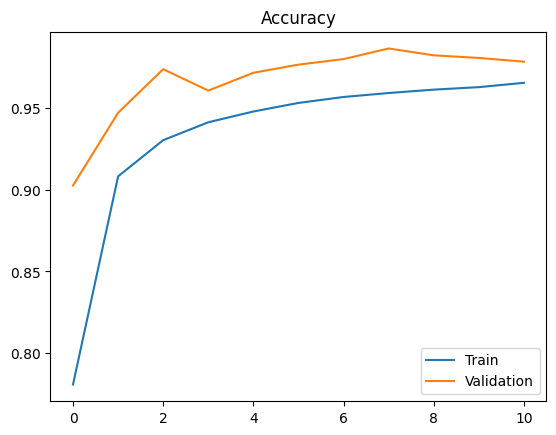

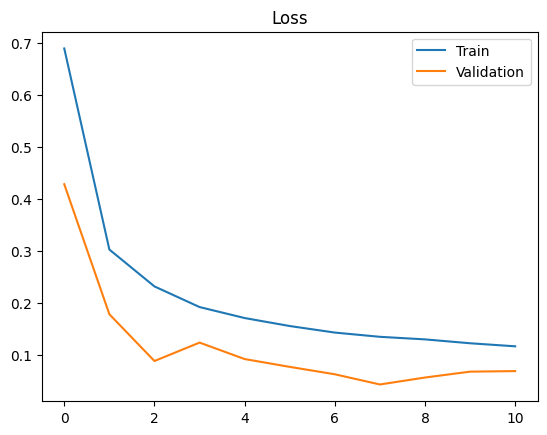

In [12]:
# 7️⃣ Plot Training History
# ==============================

def plot_history(history):
    plt.figure()
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Accuracy")
    plt.legend(["Train", "Validation"])
    plt.show()

    plt.figure()
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Loss")
    plt.legend(["Train", "Validation"])
    plt.show()

plot_history(history)

In [13]:
# 8️⃣ Evaluate Model
# ==============================

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc, 4))
print("Test Loss:", round(test_loss, 4))

Test Accuracy: 0.9867
Test Loss: 0.0435


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


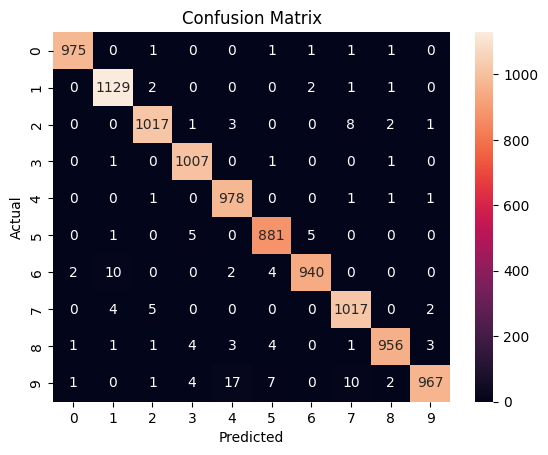

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


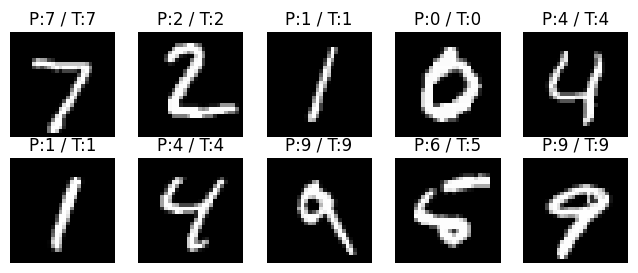

In [14]:
# 9️⃣ Confusion Matrix
# ==============================

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================
# 🔟 Show Predictions
# ==============================

def show_predictions(model, x, y, n=10):
    preds = model.predict(x[:n])
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(8,3))
    for i in range(n):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i].squeeze(), cmap="gray")
        plt.title(f"P:{pred_labels[i]} / T:{y[i]}")
        plt.axis("off")
    plt.show()

show_predictions(model, x_test, y_test, n=10)